## Logistic Regression

## Importing libraries

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [0]:
# Load Iris dataset and find out what is in this dataset
iris = datasets.load_iris()
for key, value in iris.items():
    print(key)

data
target
target_names
DESCR
feature_names
filename


In [0]:
#what's in each of 
# target_names
# DESCR
# target
# feature_names
# data
# DESCR and target are shown below. 
# Continue to work out the rest by appending more cells below.

In [0]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
#Let's see the description of this dataset?
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
#What's in target?
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
#How many 0s, 1s, and 2s are in target?
unique_elements, counts_elements = np.unique(iris['target'], return_counts=True)
print(np.array((unique_elements, counts_elements)))

[[ 0  1  2]
 [50 50 50]]


## Using Logistic Regression for binary class classification

In [0]:
# Let's focus on data with only two classes ( the first 100 entries)
data_100 = iris.data[:100,:]
target_100 = iris.target[:100]

In [0]:
#check the size of data_100
data_100.size

400

## Standardize Features

In [0]:
#What's the mean and standard deviation of data_100 and target_100
print("data_100 mean:",data_100.mean())
print("data_100 standard deviation:",data_100.std())
print("target_100 mean:",target_100.mean())
print("target_100 standard deviation:",target_100.std())

data_100 mean: 3.05425
data_100 standard deviation: 1.8745617987945877
target_100 mean: 0.5
target_100 standard deviation: 0.5


In [0]:
scaler = StandardScaler()
# Transform the feature
data_100_standardized = scaler.fit_transform(data_100)

In [0]:
#what's the mean and standard deviation of the standardized data_100
print('Mean of standardized data_100:',data_100_standardized.mean())
print('Standard Deviation of standardized data_100:',data_100_standardized.std())

Mean of standardized data_100: -1.1723955140041654e-15
Standard Deviation of standardized data_100: 0.9999999999999998


## Create Logistic Regression

In [0]:
#Let's create a dataframe table to store all the features
features = pd.DataFrame(data_100_standardized, columns=iris.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.581066,0.841837,-1.012978,-1.042111
1,-0.894309,-0.207835,-1.012978,-1.042111
2,-1.207552,0.212034,-1.082312,-1.042111
3,-1.364174,0.002099,-0.943643,-1.042111
4,-0.737687,1.051772,-1.012978,-1.042111


In [0]:
#Create another dataframe to store the target
target = pd.DataFrame(target_100, columns=['target'])
target.head(2)

,target
0,0
1,0


In [0]:
# let's combine these two 'tables' into one dataframe
df = pd.concat([features,target], axis=1)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.581066,0.841837,-1.012978,-1.042111,0
1,-0.894309,-0.207835,-1.012978,-1.042111,0


In [0]:
#find out which is most correlated to the target?
df.corr().abs().target.sort_values(ascending=False)[1:]

petal length (cm)    0.969990
petal width (cm)     0.960307
sepal length (cm)    0.728290
sepal width (cm)     0.690684
Name: target, dtype: float64

In [0]:
# Create logistic regression object
LogReg = LogisticRegression()

## Train Logistic Regression

In [0]:
#Create (X,y) data pair ready for fitting the model
X = df[iris.feature_names]
y=df['target']

In [0]:
# Train model using the entire dataset
LogReg.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Add a column predictions to the df datagrame on the predicted values based on X
df['pred'] = LogReg.predict(X)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
0,-0.581066,0.841837,-1.012978,-1.042111,0,0
1,-0.894309,-0.207835,-1.012978,-1.042111,0,0
2,-1.207552,0.212034,-1.082312,-1.042111,0,0
3,-1.364174,0.002099,-0.943643,-1.042111,0,0
4,-0.737687,1.051772,-1.012978,-1.042111,0,0


In [0]:
#What's the score of using the entire dataset to train our Logistic Regression?
print(LogReg.score(X,y))

1.0


In [0]:
LogReg.predict_proba(X)[0:10]

array([[0.98903098, 0.01096902],
       [0.97147655, 0.02852345],
       [0.98761203, 0.01238797],
       [0.98285162, 0.01714838],
       [0.99241544, 0.00758456],
       [0.98577523, 0.01422477],
       [0.99021507, 0.00978493],
       [0.98631076, 0.01368924],
       [0.98049017, 0.01950983],
       [0.9809501 , 0.0190499 ]])

In [0]:
# show the probability of each class(row) as validated against X
df['target_pred_prob'] = LogReg.predict_proba(X)[:, 1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred,target_pred_prob
0,-0.581066,0.841837,-1.012978,-1.042111,0,0,0.010969
1,-0.894309,-0.207835,-1.012978,-1.042111,0,0,0.028523
2,-1.207552,0.212034,-1.082312,-1.042111,0,0,0.012388
3,-1.364174,0.002099,-0.943643,-1.042111,0,0,0.017148
4,-0.737687,1.051772,-1.012978,-1.042111,0,0,0.007585


Text(0, 0.5, 'target')

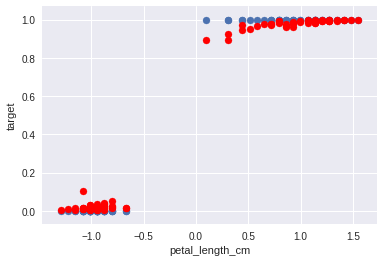

In [0]:
# scatter plot the petal length (cm) against y (the target)
# scatter plot on the same plot the petal length (cm) against the predicted probabilities in different color, e.g.,red. 
df.rename(columns={'petal length (cm)':'petal_length_cm'},inplace=True)
plt.scatter(df.petal_length_cm, df.target)
plt.scatter(df.petal_length_cm, df.target_pred_prob, color='red')
plt.xlabel('petal_length_cm')
plt.ylabel('target')

##  Multi-class classification using Logistic Regression

In [0]:
#Load Iris dataset again
iris = datasets.load_iris()

In [0]:
#Standardize the dataset
scaler2 = StandardScaler()

# Transform the feature
standardized_data = scaler2.fit_transform(iris.data)

In [0]:
#create dataframes for data and target separately
data = pd.DataFrame(standardized_data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['target'])

In [0]:
#Combine data and target into one big dataframe tables
big_df=pd.concat([data,target],axis=1)
big_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [0]:
#check how many different values does target have?
big_df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [0]:
#Create a new copy of Logistic Regression class
LogRegM = LogisticRegression()

In [0]:
#Define (X,y) to be used for training the model
X=big_df[iris.feature_names]
y=big_df['target']

In [0]:
#Fit the model with all the data
#Find out how well it scores
LogRegM.fit(X,y)
print(LogRegM.score(X,y))

0.9266666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Show which ones (rows) the model fail to predict 
big_df['pred'] = LogRegM.predict(X)
big_df.loc[~(big_df['target']==big_df['pred'])]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
51,0.674501,0.328414,0.421734,0.395774,1,2
52,1.280340,0.098217,0.649083,0.395774,1,2
56,0.553333,0.558611,0.535409,0.527406,1,2
70,0.068662,0.328414,0.592246,0.790671,1,2
77,1.038005,-0.131979,0.705921,0.659038,1,2
85,0.189830,0.788808,0.421734,0.527406,1,2
86,1.038005,0.098217,0.535409,0.395774,1,2
106,-1.143017,-1.282963,0.421734,0.659038,2,1
119,0.189830,-1.973554,0.705921,0.395774,2,1
133,0.553333,-0.592373,0.762758,0.395774,2,1


In [0]:
#Show the predict_proba of those (rows) that the model failed to predict correctly.
df_pre = big_df.loc[~(big_df['target']==big_df['pred'])]
LogRegM.predict_proba(df_pre.iloc[:,0:4])

array([[0.08375487, 0.39784828, 0.51839685],
       [0.01978252, 0.44861961, 0.53159786],
       [0.07673632, 0.27028352, 0.65298016],
       [0.03901089, 0.21106814, 0.74992098],
       [0.008308  , 0.36195146, 0.62974054],
       [0.17863756, 0.2056876 , 0.61567484],
       [0.03196963, 0.45545321, 0.51257715],
       [0.01364452, 0.52329445, 0.46306103],
       [0.00133352, 0.63614849, 0.36251799],
       [0.00822107, 0.53172499, 0.46005393],
       [0.00318708, 0.58278946, 0.41402346]])